In [2]:
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from skopt.space import Integer
import matplotlib.pyplot as plt
from preprocess import get_data

In [3]:
trainData =get_data("train/","ascii_file_counts.csv")
testData = get_data("test","ascii_file_counts.csv")
XTrain, ytrain = trainData
XTest, ytest = testData

In [9]:
model = KNeighborsClassifier(weights="distance")

In [10]:
param_space = {
    'n_neighbors': Integer(1,200)      # Minimum samples per leaf
}

In [11]:
bayes_opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=20,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Objective: minimize error
    n_jobs=-1,  # Use all CPU cores
    random_state=42,
    verbose=3
)

In [12]:
bayes_opt.fit(XTrain, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(5610) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5611) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5612) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5613) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5614) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 5/5] END .................n_neighbors=83;, score=-548.182 total time= 1.3min
[CV 1/5] END .................n_neighbors=83;, score=-534.318 total time= 3.1min
[CV 2/5] END .................n_neighbors=83;, score=-536.599 total time= 3.2min
[CV 4/5] END .................n_neighbors=83;, score=-537.160 total time= 3.2min
[CV 3/5] END .................n_neighbors=83;, score=-535.319 total time= 3.2min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................n_neighbors=168;, score=-636.550 total time= 2.6min
[CV 3/5] END ................n_neighbors=168;, score=-649.564 total time= 2.6min
[CV 4/5] END ................n_neighbors=168;, score=-635.018 total time= 3.8min
[CV 2/5] END ................n_neighbors=168;, score=-641.443 total time= 3.8min
[CV 5/5] END ................n_neighbors=168;, score=-653.345 total time= 3.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(5949) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5950) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5] END .................n_neighbors=90;, score=-545.398 total time= 2.0min
[CV 5/5] END .................n_neighbors=90;, score=-556.324 total time= 2.0min
[CV 4/5] END .................n_neighbors=90;, score=-541.235 total time= 3.1min
[CV 2/5] END .................n_neighbors=90;, score=-541.809 total time= 3.1min
[CV 3/5] END .................n_neighbors=90;, score=-545.819 total time= 3.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ................n_neighbors=163;, score=-631.895 total time= 1.0min
[CV 3/5] END ................n_neighbors=163;, score=-644.851 total time= 4.4min
[CV 5/5] END ................n_neighbors=163;, score=-647.527 total time= 4.4min
[CV 4/5] END ................n_neighbors=163;, score=-629.844 total time= 4.5min
[CV 1/5] END ................n_neighbors=163;, score=-634.374 total time= 4.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(6319) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 3/5] END ................n_neighbors=160;, score=-640.892 total time= 1.1min
[CV 2/5] END ................n_neighbors=160;, score=-630.169 total time= 2.6min
[CV 4/5] END ................n_neighbors=160;, score=-629.041 total time= 3.5min
[CV 1/5] END ................n_neighbors=160;, score=-632.225 total time= 3.5min
[CV 5/5] END ................n_neighbors=160;, score=-644.451 total time= 3.5min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END ................n_neighbors=147;, score=-630.399 total time= 5.2min
[CV 5/5] END ................n_neighbors=147;, score=-630.196 total time= 5.2min
[CV 1/5] END ................n_neighbors=147;, score=-616.589 total time= 5.8min
[CV 4/5] END ................n_neighbors=147;, score=-618.676 total time= 5.8min
[CV 2/5] END ................n_neighbors=147;, score=-617.017 total time= 5.9min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(6728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5] END ................n_neighbors=124;, score=-588.771 total time= 1.8min
[CV 2/5] END ................n_neighbors=124;, score=-583.761 total time= 1.8min
[CV 1/5] END ................n_neighbors=124;, score=-590.373 total time= 2.8min
[CV 3/5] END ................n_neighbors=124;, score=-597.668 total time= 2.8min
[CV 5/5] END ................n_neighbors=124;, score=-605.424 total time= 2.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................n_neighbors=109;, score=-569.972 total time= 1.8min
[CV 2/5] END ................n_neighbors=109;, score=-565.531 total time= 2.3min
[CV 4/5] END ................n_neighbors=109;, score=-570.707 total time= 3.4min
[CV 5/5] END ................n_neighbors=109;, score=-585.570 total time= 3.4min
[CV 3/5] END ................n_neighbors=109;, score=-577.425 total time= 3.5min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(7088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5] END ................n_neighbors=191;, score=-658.544 total time= 2.1min
[CV 3/5] END ................n_neighbors=191;, score=-669.411 total time= 2.1min
[CV 1/5] END ................n_neighbors=191;, score=-666.772 total time= 3.3min
[CV 2/5] END ................n_neighbors=191;, score=-661.876 total time= 3.3min
[CV 5/5] END ................n_neighbors=191;, score=-674.646 total time= 3.3min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(7180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5] END ..................n_neighbors=2;, score=-343.657 total time= 1.6min
[CV 5/5] END ..................n_neighbors=2;, score=-329.927 total time= 1.6min
[CV 4/5] END ..................n_neighbors=2;, score=-330.400 total time= 2.7min
[CV 2/5] END ..................n_neighbors=2;, score=-324.653 total time= 2.7min
[CV 3/5] END ..................n_neighbors=2;, score=-325.363 total time= 2.7min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ..................n_neighbors=1;, score=-324.653 total time= 1.2min
[CV 5/5] END ..................n_neighbors=1;, score=-329.927 total time= 3.9min
[CV 4/5] END ..................n_neighbors=1;, score=-330.400 total time= 4.1min
[CV 3/5] END ..................n_neighbors=1;, score=-325.363 total time= 4.1min
[CV 1/5] END ..................n_neighbors=1;, score=-343.657 total time= 4.1min


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [117]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


python(7606) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7607) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5] END ................n_neighbors=117;, score=-580.117 total time= 1.9min
[CV 1/5] END ................n_neighbors=117;, score=-582.926 total time= 2.7min
[CV 5/5] END ................n_neighbors=117;, score=-595.026 total time= 2.7min
[CV 4/5] END ................n_neighbors=117;, score=-582.062 total time= 3.1min
[CV 3/5] END ................n_neighbors=117;, score=-586.712 total time= 3.1min


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [66]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END .................n_neighbors=66;, score=-510.911 total time= 1.7min
[CV 4/5] END .................n_neighbors=66;, score=-512.564 total time= 2.2min
[CV 5/5] END .................n_neighbors=66;, score=-514.862 total time= 2.7min
[CV 1/5] END .................n_neighbors=66;, score=-515.185 total time= 2.9min
[CV 3/5] END .................n_neighbors=66;, score=-509.290 total time= 2.9min


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [38]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END .................n_neighbors=38;, score=-451.740 total time= 1.3min
[CV 2/5] END .................n_neighbors=38;, score=-457.650 total time= 4.1min
[CV 4/5] END .................n_neighbors=38;, score=-453.752 total time= 4.1min
[CV 1/5] END .................n_neighbors=38;, score=-458.870 total time= 4.3min
[CV 5/5] END .................n_neighbors=38;, score=-456.130 total time= 4.3min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [177]
  warnings.warn(
python(8184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 1/5] END ................n_neighbors=177;, score=-648.767 total time= 1.9min
[CV 3/5] END ................n_neighbors=177;, score=-655.268 total time= 1.9min
[CV 2/5] END ................n_neighbors=177;, score=-648.974 total time= 3.1min
[CV 4/5] END ................n_neighbors=177;, score=-649.442 total time= 3.1min
[CV 5/5] END ................n_neighbors=177;, score=-664.228 total time= 3.1min


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [108]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END ................n_neighbors=108;, score=-567.270 total time= 1.6min
[CV 1/5] END ................n_neighbors=108;, score=-568.975 total time= 4.0min
[CV 3/5] END ................n_neighbors=108;, score=-574.087 total time= 4.0min
[CV 2/5] END ................n_neighbors=108;, score=-563.499 total time= 4.0min
[CV 5/5] END ................n_neighbors=108;, score=-581.686 total time= 4.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [192]
  warnings.warn(
python(8507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 2/5] END ................n_neighbors=192;, score=-666.523 total time= 1.8min
[CV 5/5] END ................n_neighbors=192;, score=-675.426 total time= 1.8min
[CV 1/5] END ................n_neighbors=192;, score=-666.915 total time= 2.9min
[CV 4/5] END ................n_neighbors=192;, score=-659.844 total time= 2.9min
[CV 3/5] END ................n_neighbors=192;, score=-671.726 total time= 2.9min


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [90]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END .................n_neighbors=90;, score=-541.235 total time= 1.8min
[CV 5/5] END .................n_neighbors=90;, score=-556.324 total time= 1.8min
[CV 1/5] END .................n_neighbors=90;, score=-545.398 total time= 2.8min
[CV 2/5] END .................n_neighbors=90;, score=-541.809 total time= 2.8min
[CV 3/5] END .................n_neighbors=90;, score=-545.819 total time= 2.8min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [86]
  warnings.warn(
python(8752) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 5/5] END .................n_neighbors=86;, score=-549.116 total time= 1.2min
[CV 3/5] END .................n_neighbors=86;, score=-542.050 total time= 3.0min
[CV 4/5] END .................n_neighbors=86;, score=-539.238 total time= 3.0min
[CV 1/5] END .................n_neighbors=86;, score=-541.010 total time= 3.1min
[CV 2/5] END .................n_neighbors=86;, score=-538.051 total time= 3.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [172]
  warnings.warn(
python(8882) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(8883) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 5/5] END ................n_neighbors=172;, score=-657.885 total time= 1.9min
[CV 1/5] END ................n_neighbors=172;, score=-642.707 total time= 1.9min
[CV 2/5] END ................n_neighbors=172;, score=-646.545 total time= 2.8min
[CV 4/5] END ................n_neighbors=172;, score=-642.698 total time= 2.8min
[CV 3/5] END ................n_neighbors=172;, score=-650.746 total time= 2.8min


BayesSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
              n_iter=20, n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'n_neighbors': Integer(low=1, high=200, prior='uniform', transform='normalize')},
              verbose=3)

In [15]:
import pandas as pd
knn_pd = pd.DataFrame(bayes_opt.cv_results_)
knn_pd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064111,0.000496,168.047982,44.206109,83,{'n_neighbors': 83},-534.318421,-536.598739,-535.319012,-537.160294,-548.181591,-538.315611,5.031443,5
1,0.086663,0.053364,198.867057,35.099865,168,{'n_neighbors': 168},-636.550125,-641.443240,-649.564381,-635.018197,-653.345050,-643.184198,7.178789,16
2,0.112120,0.009643,160.298747,32.857248,90,{'n_neighbors': 90},-545.397517,-541.808895,-545.818749,-541.234660,-556.323566,-546.116677,5.425451,7
3,0.092000,0.036328,227.222633,82.513811,163,{'n_neighbors': 163},-634.374458,-631.895152,-644.850808,-629.844370,-647.527101,-637.698378,7.129830,15
4,0.226454,0.037872,169.381095,57.162619,160,{'n_neighbors': 160},-632.224872,-630.169360,-640.891604,-629.040533,-644.451350,-635.355544,6.163743,14
5,0.092343,0.015884,335.607320,20.096442,147,{'n_neighbors': 147},-616.589082,-617.017146,-630.399291,-618.675667,-630.195848,-622.575407,6.343857,13
6,0.093814,0.012429,143.636641,27.987687,124,{'n_neighbors': 124},-590.373341,-583.761135,-597.667783,-588.770858,-605.423822,-593.199388,7.564157,12
7,0.076034,0.037188,173.474340,43.130829,109,{'n_neighbors': 109},-569.972211,-565.530614,-577.424649,-570.706937,-585.570002,-573.840883,6.989484,10
8,0.101953,0.009711,169.008343,37.441435,191,{'n_neighbors': 191},-666.772238,-661.876297,-669.410787,-658.543687,-674.646344,-666.249871,5.644084,19
9,0.089862,0.033016,135.053797,32.938169,2,{'n_neighbors': 2},-343.657272,-324.653462,-325.362633,-330.400210,-329.927469,-330.800209,6.834844,1


In [ ]:
knn_pd.to_csv("knn_opti.csv")

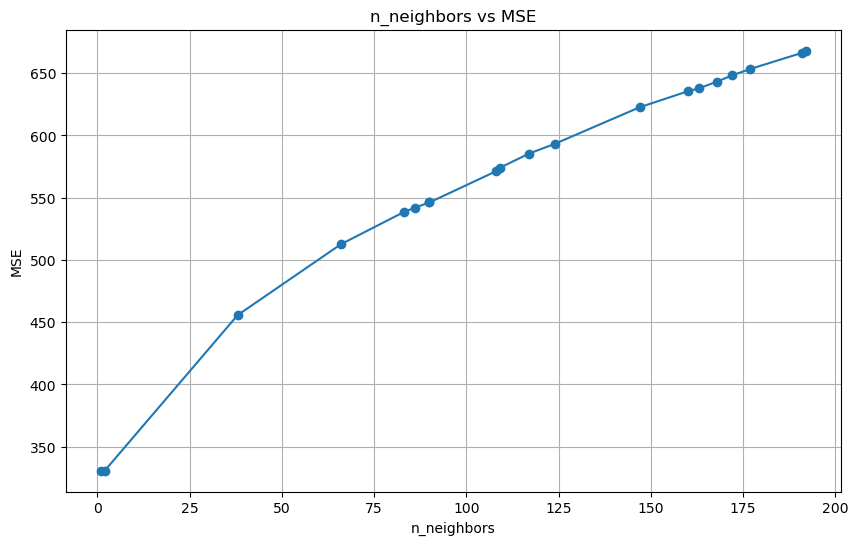

In [30]:
n_neighbors = knn_pd['param_n_neighbors']
mean_test_score = knn_pd['mean_test_score']

# Convert negative MSE to accuracy (optional: higher = better)
accuracy = -mean_test_score  # If scoring='neg_mean_squared_error'

# Sort values by n_estimators for a cleaner plot
sorted_indices = n_neighbors.argsort()
n_estimators_sorted = n_neighbors.iloc[sorted_indices]
accuracy_sorted = accuracy.iloc[sorted_indices]

# Plot n_estimators vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_sorted, accuracy_sorted, marker='o', linestyle='-')
plt.title('n_neighbors vs MSE')
plt.xlabel('n_neighbors')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [6]:
import joblib
knn = KNeighborsClassifier(weights="distance", n_neighbors = 2)
knn.fit(XTrain, ytrain)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [7]:
from classifiers import train_knn
knn = train_knn(XTrain, ytrain, n_neighbors = 2)

In [9]:
from testing_models import evaluate_model
print(ytest, knn.predict(XTest))

[ 0  0  0 ... 92 92 92] [ 0  0 74 ... 92 92 92]


In [1]:
joblib.dump(knn, 'knn.joblib')

NameError: name 'joblib' is not defined